## 로지스틱 회귀

> - 선형 회귀 : 선을 이용해서 답을 맞추는 행위 <br>
> - 로지스틱 회귀 : 확률을 이용해서 답을 맞추는 행위

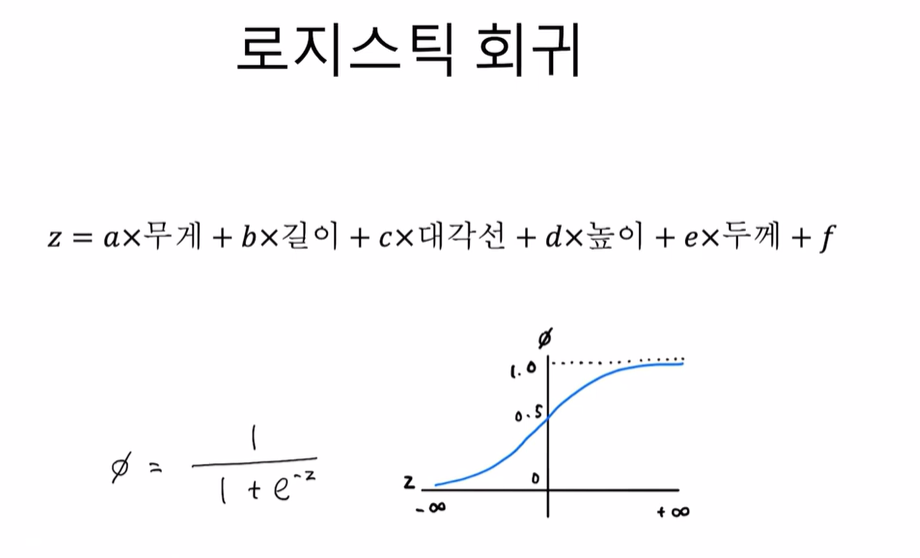

In [1]:
from IPython.display import Image, display
display(Image(filename="img/img39.png", width=800, height=600))

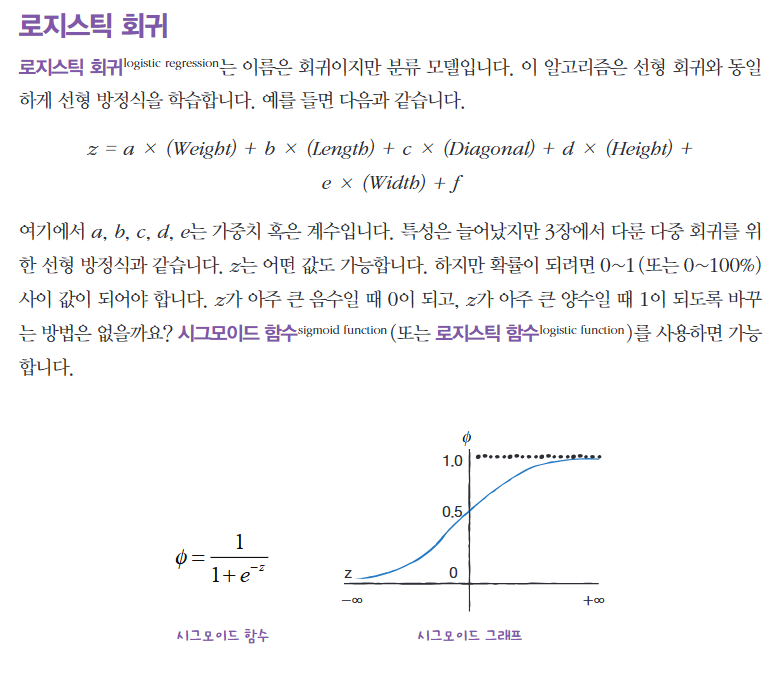

In [2]:
display(Image(filename="img/img40.png", width=800, height=600))

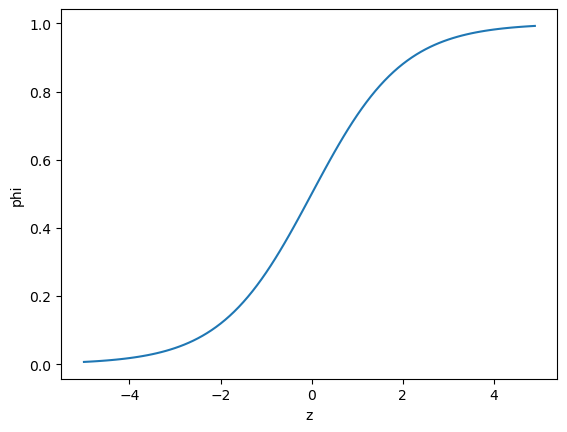

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# -5와 5 사이에 0.1 간격으로 배열 z를 만든다.(시그모이드 함수)
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기 

In [4]:
# 배열에서 A 와 C 만 선댁
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [5]:
import pandas as pd
# 1. 데이터 블러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
# fish.head()

In [6]:
# 2. 입력과 타깃 구분
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
# fish_input.head() Species= 스피쉬즈
fish_target = fish['Species']

In [7]:
# 3. 훈련/테스트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [8]:
# 4. 데이터 표준화 (스케일링)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 5. 도미(Bream)와 빙어(Smelt)만 선택
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [10]:
# 로지스틱 회귀 사용하기 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [11]:
# 훈련모델을 사용해서 train_bream_smelt에 있는5개 샘플을 예측
# 두번째 를 제외하고 모두 Bream (도미=브림)로 예측 Smelt(빙어=스멜트)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [12]:
# 예측 확률은 
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [13]:
print(lr.classes_)
print(lr.coef_, lr.intercept_)

['Bream' 'Smelt']
[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


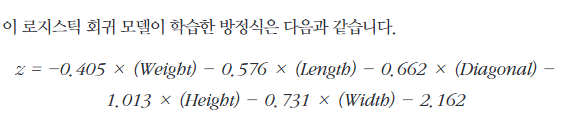

In [14]:
from IPython.display import Image, display
display(Image(filename="img/img41.png", width=800, height=600))

In [15]:
# 로직스틱 클래스는 decision_function 메서드 사용하면 z과 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [16]:
# 위 값을 시그모이드 함수에 적용하면 확률을 얻을 수 있다.
# numpy에서 제공한다.
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]
